In [54]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("~/data/baby.data")
print(data.head())
print(data.info())

       i     Id     Name  Year Gender State  Count
0  11349  11350     Emma  2004      F    AK   62.0
1  11350  11351  Madison  2004      F    AK   48.0
2  11351  11352   Hannah  2004      F    AK   46.0
3  11352  11353    Grace  2004      F    AK   44.0
4  11353  11354    Emily  2004      F    AK   41.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016395 entries, 0 to 1016394
Data columns (total 7 columns):
i         1016395 non-null int64
Id        1016395 non-null int64
Name      1016395 non-null object
Year      1016395 non-null int64
Gender    1016394 non-null object
State     1016394 non-null object
Count     1016394 non-null float64
dtypes: float64(1), int64(3), object(3)
memory usage: 54.3+ MB
None


In [55]:
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
print(data.head())

       i     Id     Name  Year Gender State  Count
0  11349  11350     Emma  2004      F    AK   62.0
1  11350  11351  Madison  2004      F    AK   48.0
2  11351  11352   Hannah  2004      F    AK   46.0
3  11352  11353    Grace  2004      F    AK   44.0
4  11353  11354    Emily  2004      F    AK   41.0


Gender
F    16380293.0
M    19041194.0
Name: Count, dtype: float64


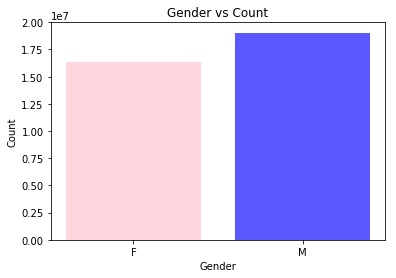

In [56]:
counts = data.groupby(data['Gender'])['Count'].sum()
print(counts)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender vs Count')
plt.bar(['F', 'M'],counts, color = ['pink', 'blue'], alpha = 0.65)
plt.show()

In [57]:
buckets = np.linspace(min(data['Count']), max(data['Count']), 11)
print(buckets)
d1 = data['Count'].loc[(data['Gender'] == 'M' )]
d2 = data['Count'].loc[(data['Gender'] == 'F' )]
d3 = pd.DataFrame()
d4 = pd.DataFrame()
d3['Female'] = pd.cut(d1, buckets)
d4['Male'] = pd.cut(d2,  buckets)

a = d3.groupby('Female').size()
b = d4.groupby('Male').size()

print(a)
print(b)

#print(d3)
#print(d4)


[   5.   421.2  837.4 1253.6 1669.8 2086.  2502.2 2918.4 3334.6 3750.8
 4167. ]
Female
(5.0, 421.2]        389248
(421.2, 837.4]        4375
(837.4, 1253.6]        995
(1253.6, 1669.8]       416
(1669.8, 2086.0]       200
(2086.0, 2502.2]        86
(2502.2, 2918.4]        63
(2918.4, 3334.6]        25
(3334.6, 3750.8]        11
(3750.8, 4167.0]         7
dtype: int64
Male
(5.0, 421.2]        470465
(421.2, 837.4]        2639
(837.4, 1253.6]        499
(1253.6, 1669.8]       172
(1669.8, 2086.0]        43
(2086.0, 2502.2]        34
(2502.2, 2918.4]        16
(2918.4, 3334.6]         9
(3334.6, 3750.8]         6
(3750.8, 4167.0]         0
dtype: int64


['F' 'M']
[   5.   421.2  837.4 1253.6 1669.8 2086.  2502.2 2918.4 3334.6 3750.8
 4167. ]
Female
(5.0, 421.2]        389248
(421.2, 837.4]        4375
(837.4, 1253.6]        995
(1253.6, 1669.8]       416
(1669.8, 2086.0]       200
(2086.0, 2502.2]        86
(2502.2, 2918.4]        63
(2918.4, 3334.6]        25
(3334.6, 3750.8]        11
(3750.8, 4167.0]         7
dtype: int64
Male
(5.0, 421.2]        470465
(421.2, 837.4]        2639
(837.4, 1253.6]        499
(1253.6, 1669.8]       172
(1669.8, 2086.0]        43
(2086.0, 2502.2]        34
(2502.2, 2918.4]        16
(2918.4, 3334.6]         9
(3334.6, 3750.8]         6
(3750.8, 4167.0]         0
dtype: int64


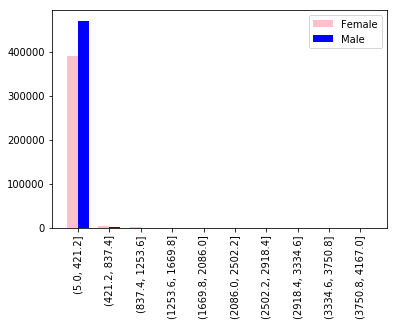

In [58]:
import numpy as np

#index = np.arange(10)

#f_values = pd.cut(data.loc[(data['Gender'] == 'F' )]['Count'], 10)
#print(f_values)

data.dropna(inplace = True)
print(data['Gender'].unique())



buckets = np.linspace(min(data['Count']), max(data['Count']), 11)
print(buckets)
d1 = data['Count'].loc[(data['Gender'] == 'M' )]
d2 = data['Count'].loc[(data['Gender'] == 'F' )]
d3 = pd.DataFrame()
d4 = pd.DataFrame()
d3['Female'] = pd.cut(d1, buckets)
d4['Male'] = pd.cut(d2,  buckets)

a = d3.groupby('Female').size()
b = d4.groupby('Male').size()

print(a)
print(b)

categories = new_df['Female'].cat.categories

ind = np.array([x for x, _ in enumerate(categories)])
width = 0.35       
plt.bar(ind, a, width, label='Female', color = 'pink')
plt.bar(ind + width, b, width, label='Male', color = 'blue')

plt.xticks(ind + width / 2, categories)
plt.legend(loc='best')
plt.xticks(rotation = 90)
plt.show()

#plt.bar(index, means_men, bar_width,
 #               alpha=opacity, color='b',
  #              label='Men')

#rects2 = ax.bar(index + bar_width, means_women, bar_width,
 #               alpha=opacity, color='r',
  #              yerr=std_women, error_kw=error_config,
   #             label='Women')

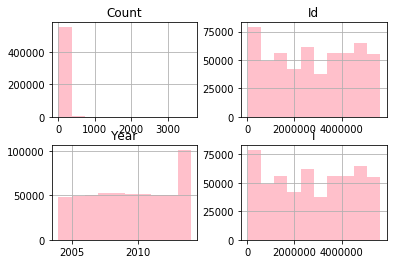

In [59]:
data.loc[(data['Gender'] == 'F' )].hist(bins=10, color = 'pink')
plt.show()

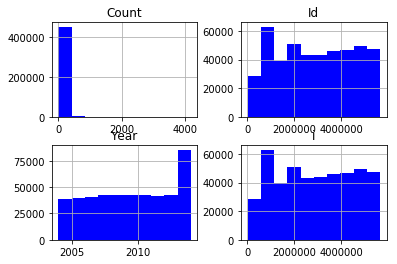

In [60]:
data.loc[(data['Gender'] == 'M' )].hist(bins=10, color = 'blue')
plt.show()

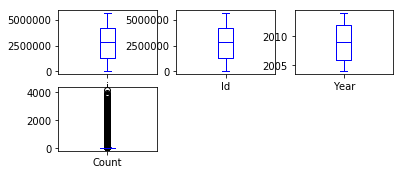

In [61]:
data.loc[(data['Gender'] == 'M' )].plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, color = 'blue')
plt.show()

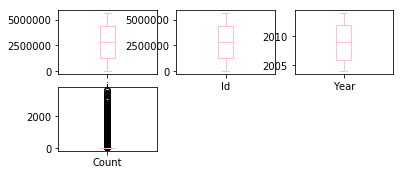

In [62]:
data.loc[(data['Gender'] == 'F' )].plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, color = 'pink' )
plt.show()

In [63]:
print((data.sort_values(['Count'], ascending= 0)['Name']).unique()[0:5])


['Daniel' 'Anthony' 'Angel' 'Sophia' 'Andrew']


In [64]:
print(data['Count'].median())

11.0


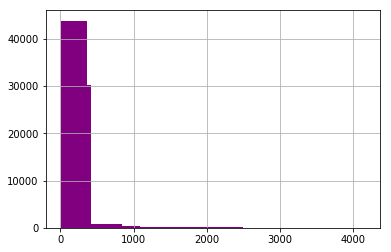

In [65]:
g_data = data.groupby(['Gender','State'])['Count']
g_data.hist(color = 'purple')
plt.show()

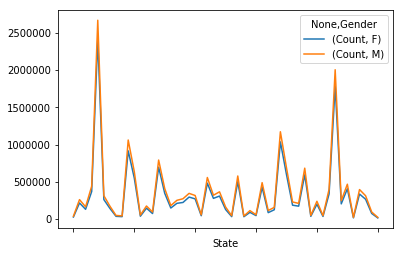

In [68]:
'''

buckets = np.arange(len(data['State'].unique()))
print(buckets)
d1 = data['Count'].loc[(data['Gender'] == 'M' )]
d2 = data['Count'].loc[(data['Gender'] == 'F' )]
d3 = pd.DataFrame()
d4 = pd.DataFrame()
d3['Female'] = pd.cut(d1, buckets)
d4['Male'] = pd.cut(d2,  buckets)

a = d3.groupby('State').size()
b = d4.groupby('State').size()

print(a)
print(b)

categories = d3.cat.categories

ind = np.array([x for x, _ in enumerate(categories)])
width = 0.35       
plt.bar(ind, a, width, label='Female', color = 'pink')
plt.bar(ind + width, b, width, label='Male', color = 'blue')

plt.xticks(ind + width / 2, categories)
plt.legend(loc='best')
plt.xticks(rotation = 90)
plt.show()
'''
#data.drop(['Id', 'Year'], inplace = True)
data1 = pd.DataFrame()
data1['State'] = data['State']
data1['Gender'] = data['Gender']
data1['Count'] = data['Count']
data1.groupby(['State','Gender']).sum().unstack().plot()